# **Modeling and Evaluation**

## Objectives

* Answer the business requirement 2, by providing a machine learning tool that can predict 'Awake' or 'Drowsy' for an image of an eye. 
* Generage a working CNN(Convolution Neural Network) model that is able to accurately predict with over a 90% accuracy 

## Inputs

* pkl file that contains the desired size of the images to be used in the model fitting
* Drowsiness dataset, a collection of .jpg files divided into three folders
* File path for each folder is as follows...
    - inputs/drowsiness/test
    - inputs/drowsiness/train
    - inputs/drowsiness/validation

## Outputs

* Bar graph of distribution of images in test, train, validation sets.
* Augmented images, anda plot for augmented images per label
* Creation of machine learning model
* Optimised hyperparameter settings through Keras tuner
* Model training
* Saved model 
* Model  learning curve (Accuracy and Loss) line graphs
* Model evaluation calculated
* Confusion Matrix
* pkl file that contains the evaluated model data
* Prediction of random image from dataset


---

## Import Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import tensorflow as tf
sns.set_style("white")
from matplotlib.image import imread

# Change working directory

In [2]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\cmjim\\ml_pp5_drowsiness_detector\\jupyter_notebooks'

* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [3]:
os.chdir('C:\\Users\\cmjim\\ml_pp5_drowsiness_detector')
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [4]:
current_dir = os.getcwd()
current_dir

'C:\\Users\\cmjim\\ml_pp5_drowsiness_detector'

## Set Input Directories

In [5]:
my_data_dir = r'inputs\drowsiness'
train_path = my_data_dir + '/train' 
val_path = my_data_dir + '/validation'
test_path = my_data_dir + '/test'

---

## Set Output Directories

In [6]:
version = 'v3'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(current_dir) and version in os.listdir(current_dir +
                                                                  '/outputs'):
    print(f'Old version is already available, change version variable'
          f'and create a new version.')
    pass
else:
    os.makedirs(name=file_path)

Old version is already available, change version variableand create a new version.


## Set Label Names

In [7]:
labels = os.listdir(train_path)
print('Label for the images are', labels)

Label for the images are ['Awake', 'Drowsy']


## Set Image Shape

In [8]:
import joblib
version = 'v3'
image_shape = joblib.load(filename=f"outputs/{version}/image_shape.pkl")
image_shape

(120, 160, 3)

---

## Number of Images in Train, Validation, and Test Sets

* train - Awake: 3453 images
* train - Drowsy: 3455 images
* validation - Awake: 493 images
* validation - Drowsy: 493 images
* test - Awake: 987 images
* test - Drowsy: 988 images




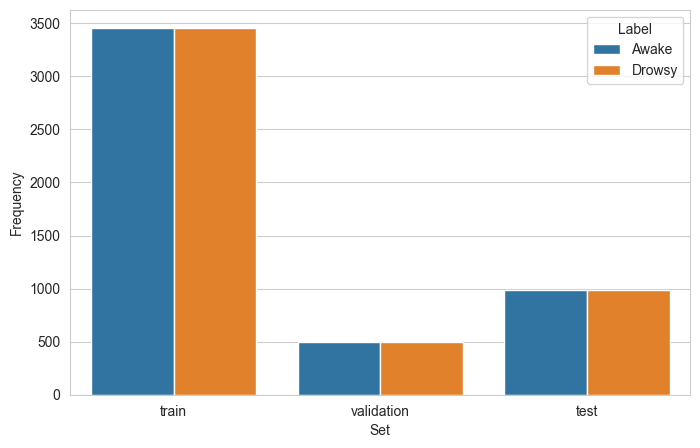

In [9]:
df_freq = pd.DataFrame([]) 

for folder in ['train', 'validation', 'test']:
    for label in labels:
        num_images = len(os.listdir(os.path.join(my_data_dir, folder, label)))
        df_freq = pd.concat([df_freq,
                            pd.DataFrame({'Set': [folder],
                                          'Label': [label],
                                          'Frequency': [num_images]})],
                            ignore_index=True)

        print(f"* {folder} - {label}: {num_images} images")

print("\n")
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.barplot(data=df_freq, x='Set', y='Frequency', hue='Label')
plt.savefig(f'{file_path}/labels_distribution.png', bbox_inches='tight', dpi=150)
plt.show()

---

# Image Data Augmentation

---

## Import Image Data Generator

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Initialize Image Data Generator

In [11]:
augmented_image_data = ImageDataGenerator(rotation_range=20,
                                          width_shift_range=0.10,
                                          height_shift_range=0.10,
                                          shear_range=0.1,
                                          zoom_range=0.1,
                                          horizontal_flip=True,
                                          vertical_flip=True,
                                          fill_mode='nearest',
                                          rescale=1./255
                                          )

### Augment Training Image Dataset

In [12]:
batch_size = 40 # Set batch size
train_set = augmented_image_data.flow_from_directory(train_path,
                                              target_size=image_shape[:2],
                                              color_mode='rgb',
                                              batch_size=batch_size,
                                              class_mode='binary',
                                              shuffle=True
                                              )

train_set.class_indices

Found 6908 images belonging to 2 classes.


{'Awake': 0, 'Drowsy': 1}

### Augment Validation Image Dataset

In [13]:
validation_set = ImageDataGenerator(rescale=1./255).flow_from_directory(val_path,
                                                          target_size=image_shape[:2],
                                                          color_mode='rgb',
                                                          batch_size=batch_size,
                                                          class_mode='binary',
                                                          shuffle=False
                                                          )

validation_set.class_indices

Found 986 images belonging to 2 classes.


{'Awake': 0, 'Drowsy': 1}

### Augment Test Image Dataset

In [14]:
test_set = ImageDataGenerator(rescale=1./255).flow_from_directory(test_path,
                                                    target_size=image_shape[:2],
                                                    color_mode='rgb',
                                                    batch_size=batch_size,
                                                    class_mode='binary',
                                                    shuffle=False
                                                    )

test_set.class_indices

Found 1975 images belonging to 2 classes.


{'Awake': 0, 'Drowsy': 1}

## Plot Augmented Train Images

(40, 120, 160, 3)


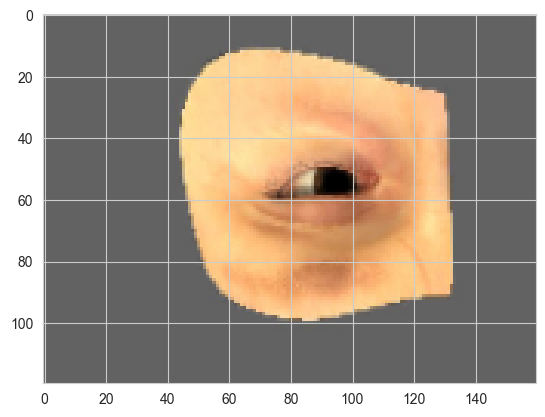

(40, 120, 160, 3)


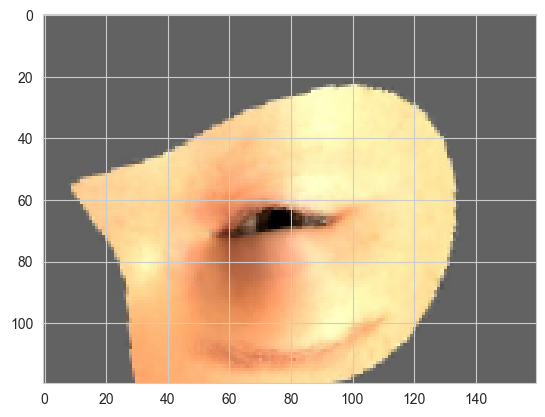

(40, 120, 160, 3)


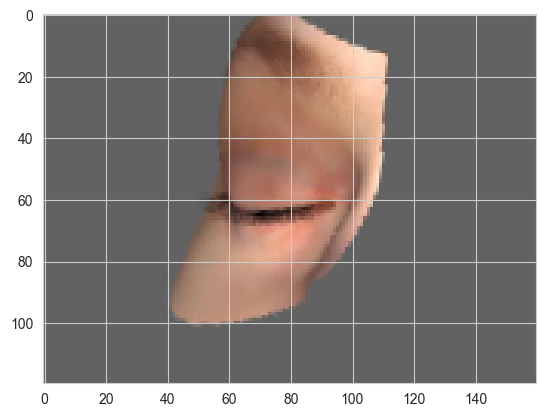

In [15]:
for _ in range(3):
    img, label = train_set.next()
    print(img.shape)
    plt.imshow(img[0])
    plt.show()

## Plot Augmented Validation Images

(40, 120, 160, 3)


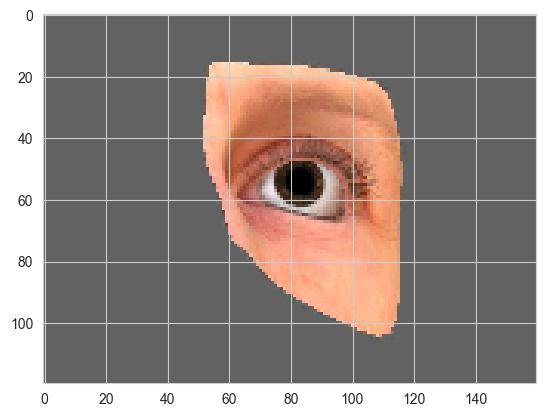

(40, 120, 160, 3)


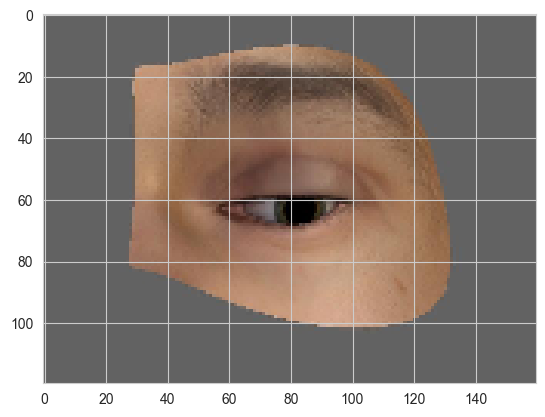

(40, 120, 160, 3)


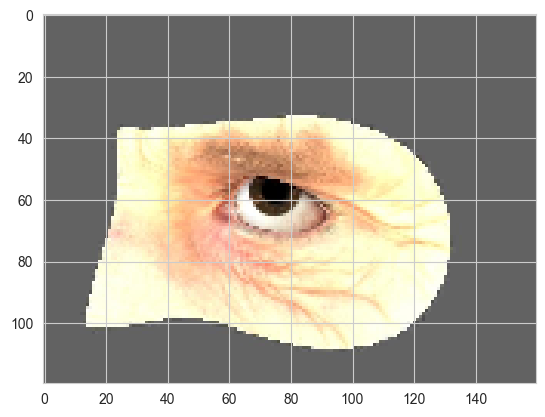

In [16]:
for _ in range(3):
    img, label = validation_set.next()
    print(img.shape)
    plt.imshow(img[0])
    plt.show()

## Plot Augmented Test Images

(40, 120, 160, 3)


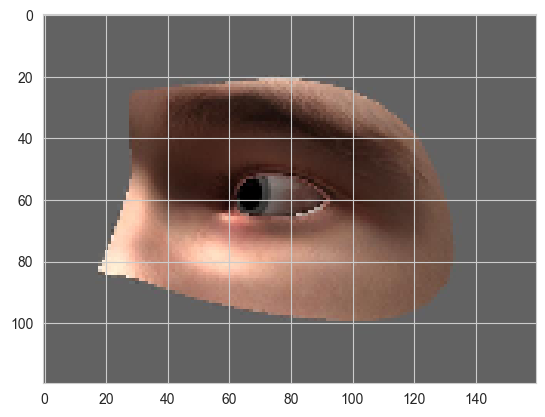

(40, 120, 160, 3)


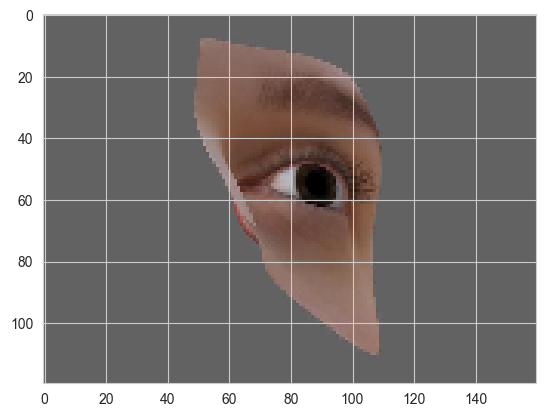

(40, 120, 160, 3)


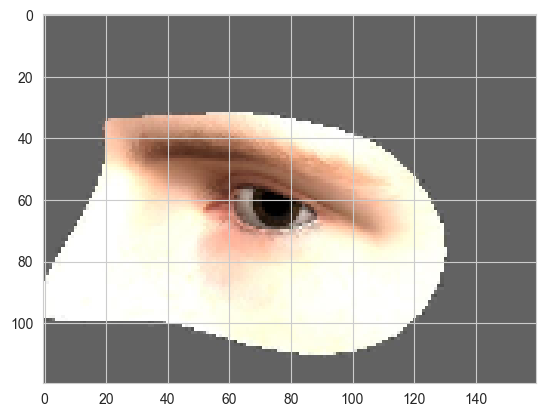

In [17]:
for _ in range(3):
    img, label = test_set.next()
    print(img.shape)
    plt.imshow(img[0])
    plt.show()

### Save class_indices

In [18]:
joblib.dump(value=train_set.class_indices ,
            filename=f"{file_path}/class_indices.pkl")

['outputs/v3/class_indices.pkl']

---

# Model Creation

---

## Import Packages 

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import models, layers, regularizers
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import RMSprop, Adam, Adagrad
import tensorflow as tf
from tensorflow import keras
import keras_tuner as kt

In [20]:
def model_builder(hp):
    '''
    Builds models with varying hyperparameter configurations on which
    hyperparameter optimisation is run.
    '''
    model = Sequential()

    model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=image_shape,
                     activation='relu',))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=image_shape,
                     activation='relu',))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=image_shape,
                     activation='relu',))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    hp_units = hp.Int('units', min_value=64, max_value=512, step=64)
    model.add(Dense(units=hp_units, activation='relu'))

    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-3, 1e-4])
    opt = keras.optimizers.Adam(learning_rate=hp_learning_rate)

    model.compile(loss='binary_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])
    
    return model

#### Run model_builder function through Karas Tuner using Hyperband Tuner

In [21]:
tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory=file_path,
                     project_name='hypertuning'
                     )

#### Early Stopping

In [22]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=3)

#### Run hyperparameter search on 'tuner'

In [23]:
tuner.search(train_set,
             epochs=25,
             steps_per_epoch=len(train_set.classes) // batch_size,
             validation_data=validation_set,
             callbacks=[early_stop],
             verbose=1)

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the
first densely-connected layer is {best_hps.get('units')} and the optimal
learning rate for the optimizer is {best_hps.get('learning_rate')}.
""")

Trial 22 Complete [00h 04m 49s]
val_accuracy: 0.9320486783981323

Best val_accuracy So Far: 0.9614604711532593
Total elapsed time: 01h 13m 24s
INFO:tensorflow:Oracle triggered exit

The hyperparameter search is complete. The optimal number of units in the
first densely-connected layer is 320 and the optimal
learning rate for the optimizer is 0.001.



#### Re-instantiate the hypermodel and train it with the optimal number of units.

In [24]:
model = tuner.hypermodel.build(best_hps)

#### Display model summary to view total params and trainable params 

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 118, 158, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 59, 79, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 57, 77, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 28, 38, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 26, 36, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 13, 18, 64)       

## Fit Model for Training

In [26]:
model.fit(train_set,
          epochs=25,
          steps_per_epoch = len(train_set.classes) // batch_size,
          validation_data=validation_set,
          callbacks=[early_stop],
          verbose=1
          )

Epoch 1/25
172/172 [==============================] - 73s 421ms/step - loss: 0.3767 - accuracy: 0.8168 - val_loss: 0.1485 - val_accuracy: 0.9493
Epoch 2/25
172/172 [==============================] - 71s 413ms/step - loss: 0.2230 - accuracy: 0.9218 - val_loss: 0.2155 - val_accuracy: 0.9128
Epoch 3/25
172/172 [==============================] - 71s 413ms/step - loss: 0.2015 - accuracy: 0.9237 - val_loss: 0.1467 - val_accuracy: 0.9412
Epoch 4/25
172/172 [==============================] - 71s 413ms/step - loss: 0.1897 - accuracy: 0.9304 - val_loss: 0.1327 - val_accuracy: 0.9615
Epoch 5/25
172/172 [==============================] - 71s 411ms/step - loss: 0.1881 - accuracy: 0.9329 - val_loss: 0.1214 - val_accuracy: 0.9604
Epoch 6/25
172/172 [==============================] - 71s 412ms/step - loss: 0.1746 - accuracy: 0.9367 - val_loss: 0.1403 - val_accuracy: 0.9473
Epoch 7/25
172/172 [==============================] - 71s 410ms/step - loss: 0.1699 - accuracy: 0.9399 - val_loss: 0.1334 - val_ac

## Save Model

In [27]:
model.save('outputs/v3/drowsiness_detector_model.h5')

c:\Users\cmjim\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


---

# Model Performance

---

## Model Learning Curve

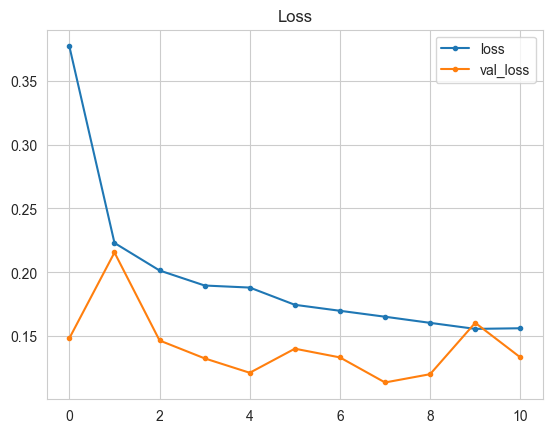

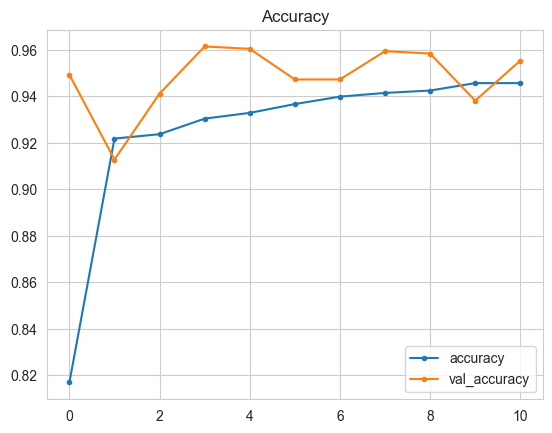

In [28]:
losses = pd.DataFrame(model.history.history)

sns.set_style("whitegrid")
losses[['loss','val_loss']].plot(style='.-')
plt.title("Loss")
plt.savefig(f'{file_path}/model_training_losses.png', bbox_inches='tight', dpi=150)
plt.show()

print("\n")
losses[['accuracy','val_accuracy']].plot(style='.-')
plt.title("Accuracy")
plt.savefig(f'{file_path}/model_training_acc.png', bbox_inches='tight', dpi=150)
plt.show()

## Model Evaluation

### Load Saved Model

In [30]:
from keras.models import load_model
model = load_model('outputs/v3/drowsiness_detector_model.h5')

### Evaluate Model on Test Set

In [31]:
evaluation = model.evaluate(test_set)

50/50 [==============================] - 12s 233ms/step - loss: 0.1470 - accuracy: 0.9509


### Save Evaluation pkl File

In [32]:
joblib.dump(value=evaluation ,
            filename=f"outputs/v3/evaluation.pkl")

['outputs/v3/evaluation.pkl']

---

## Confusion Matrix

---

In [33]:
from sklearn.metrics import classification_report, confusion_matrix

50/50 [==============================] - 5s 101ms/step
              precision    recall  f1-score   support

       Awake       0.95      0.95      0.95       987
      Drowsy       0.95      0.95      0.95       988

    accuracy                           0.95      1975
   macro avg       0.95      0.95      0.95      1975
weighted avg       0.95      0.95      0.95      1975



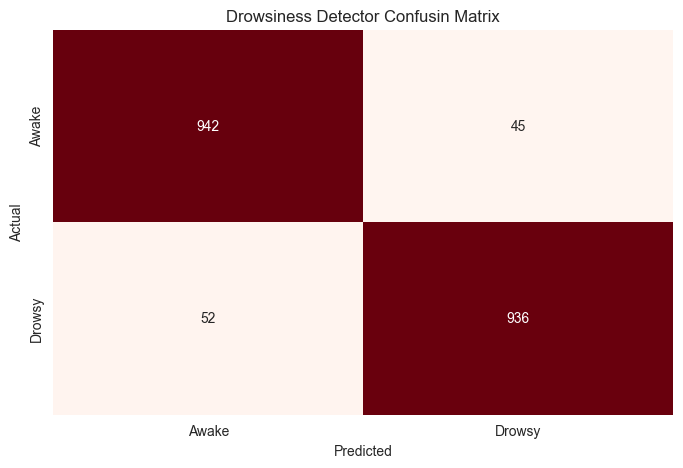

In [34]:
pred = model.predict(test_set)
y_pred = np.concatenate(np.round(pred).astype(int))
target_names = labels
con_mat = confusion_matrix(test_set.classes, y_pred)
plt.figure(figsize=(8, 5))
sns.heatmap(con_mat,
            annot=True,
            fmt='g',
            cmap='Reds',
            xticklabels=[labels[0],labels[1]],
            yticklabels=[labels[0],labels[1]],
            cbar=False)
plt.title("Drowsiness Detector Confusin Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig(f'{file_path}/confusion_matrix.png', bbox_inches='tight', dpi=150)
print(classification_report(test_set.classes, y_pred, target_names=target_names))

## Prediction on New Data

Load a random image as PIL

Image shape: (160, 120), Image mode: RGB


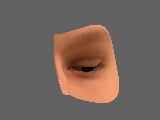

In [35]:
from tensorflow.keras.preprocessing import image

pointer = 42 
label = labels[1] # select either Awake(0), or Drowsy(1)

pil_image = image.load_img(test_path + '/'+ label + '/'+ os.listdir(test_path+'/'+ label)[pointer],
                          target_size=image_shape, color_mode='rgb')
print(f'Image shape: {pil_image.size}, Image mode: {pil_image.mode}')
pil_image

### Convert Image to Array

In [36]:
my_image = image.img_to_array(pil_image)
my_image = np.expand_dims(my_image, axis=0)/255
print(my_image.shape)

(1, 120, 160, 3)


### Predict Class of Image and Probabilties 

In [37]:
pred_proba = model.predict(my_image)[0,0]

target_map = {v: k for k, v in train_set.class_indices.items()}
pred_class =  target_map[pred_proba > 0.5]  

if pred_class == target_map[0]: pred_proba = 1 - pred_proba

print(pred_proba)
print(pred_class)

1/1 [==============================] - 0s 67ms/step
0.9013987
Drowsy
